<a href="https://colab.research.google.com/github/Mauricio-Fragoso-Mendoza/Ecuaciones-Diferenciales-Parciales-I/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se tiene la función:
$$f(x) = \cases{1 & si -1 <= x <= 1,\cr 0 & en otro caso,}$$

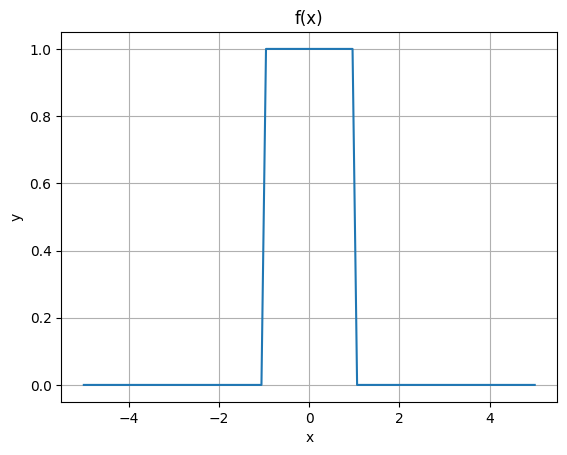

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def funcion_a_trozos(x):
    if x > -1 and x <= 1:
        return 1
    else:
        return 0

x = np.linspace(-5, 5, 100)

y = [funcion_a_trozos(xi) for xi in x]

plt.plot(x, y)

plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x)")

plt.grid(True)
plt.show()

Se graficará la integral de Fourier:

$$f(x)=\dfrac{\pi}{2} \int_0^\infty \dfrac{\cos(wx) \sin(w)}{w}dw = \dfrac{1}{\pi} \int_0^{(x+1)a} \dfrac{\sin t}{t}dt - \dfrac{1}{\pi} \int_0^{(x-1)a} \dfrac{\sin t}{t}dt$$; con $a=∞$

In [17]:
from sympy import integrate, pi, sin, cos
from sympy.abc import a,t,x

I=integrate((1/pi)*(sin(t)/t), (t,0,(x+1)*a))-integrate((1/pi)*(sin(t)/t), (t,0,(x-1)*a))
print(I)

-Si(a*(x - 1))/pi + Si(a*(x + 1))/pi


Posteriormente, se graficará el resultado de la Integral de Fourier usando: $a=8$, $a=16$ y $a=32$

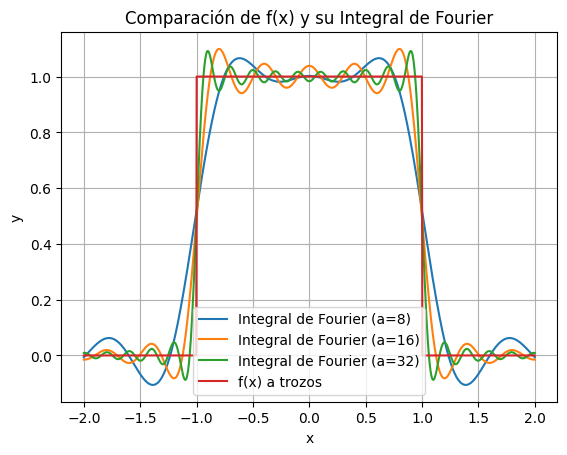

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import integrate, pi, sin, cos, lambdify
from sympy.abc import a as sympy_a, t as sympy_t, x as sympy_x
from scipy.special import sici

def funcion_a_trozos(x_val):
    if x_val > -1 and x_val <= 1:
        return 1
    else:
        return 0


I_sym = integrate((1/pi)*(sin(sympy_t)/sympy_t), (sympy_t,0,(sympy_x+1)*sympy_a))-integrate((1/pi)*(sin(sympy_t)/sympy_t), (sympy_t,0,(sympy_x-1)*sympy_a))

I_func = lambdify([sympy_x, sympy_a], I_sym, [{'Si': lambda z: sici(z)[0]}, 'numpy'])

a1_value = 8
a2_value = 16
a3_value = 32

x_vals = np.linspace(-2, 2, 1000)

I1_vals = I_func(x_vals, a1_value)
I2_vals = I_func(x_vals, a2_value)
I3_vals = I_func(x_vals, a3_value)

y_vals = [funcion_a_trozos(xi) for xi in x_vals]

plt.plot(x_vals, I1_vals, label='Integral de Fourier (a={})'.format(a1_value))
plt.plot(x_vals, I2_vals, label='Integral de Fourier (a={})'.format(a2_value))
plt.plot(x_vals, I3_vals, label='Integral de Fourier (a={})'.format(a3_value))
plt.plot(x_vals, y_vals, label='f(x) a trozos')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación de f(x) y su Integral de Fourier")
plt.legend()
plt.grid(True)
plt.show()